### Process Tiff Stack

In [1]:
import time
import pandas as pd
from pvd_io import *
from pvd_par import PVD
from IPython.display import clear_output

### Get data paths

In [2]:
# Get all tiff stacks and their paths
data_dir = 'pvd_data/'
min_file_size = 1e8  # 100 MB
datasets, sessions, files = scan_directories(data_dir, min_file_size)
print(f"Located {len(files)} tiff stacks")

Located 53 tiff stacks


### Batch Process Data

In [8]:
# Execute pipeline
for ii, file in enumerate(files):  # Slice like so to get a range of files[:1]
    clear_output(wait=True)

    # Set path
    data_path = 'pvd_data'
    results_path = 'pvd_analysis'
    dataset = datasets[ii]
    session = sessions[ii]
    output_path = f"{results_path}/{dataset}/{session}/"

    # Capture and display output
    output_capture = OutputCapture()
    sys.stdout = output_capture

    try:
        print(f"Processing tiff stack {ii}/{len(files)}")
        print(f"{datasets[ii]} {sessions[ii]}")
        pvd = PVD(data_path, dataset, session, file)
        pvd.run_pipeline()

        print(f"Saving data to drive...")
        pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=False, save_labeled_tiff=False)

    finally:
        sys.stdout = output_capture.original_stdout

    # Save cell output
    with open(f"{output_path}output.txt", 'w') as f:
        f.write(str(output_capture.get_output()))

    # Clear memory
    del pvd

    time.sleep(1)

Processing tiff stack 52/53
DataSet04 expDS4_13
Starting pipeline.
Data loaded. Shape: (4, 103, 2048, 2048): 2.49 seconds
Data cropped. Shape: (4, 103, 2000, 2000): 4.92 seconds
Preprocessing complete: 68.97 seconds
Data skeletonized: 184.48 seconds
Number of tips per timepoint: [128, 143, 160, 217]
Number of knots per timepoint: [353, 350, 368, 459]
Outer segments found. Number of outer segments per timepoint: [41, 36, 33, 85]: 3.02 seconds
Matched 0 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [0, 0, 0, 0]: 0.07 seconds
Unmatched segments grouped: 5.16 seconds
All timepoints labeled successfully
Number of unique labels: 1
Processed data labeled: 22.88 seconds
Volume changes DataFrame generated: 23.43 seconds
Pipeline complete. Total time: 315.43 seconds
Saving data to drive...
Skeleton visualizations saved to pvd_analysis/DataSet04/expDS4_13//visualizations
Outer segment visualizations saved to pvd_analysis/DataSet04/expDS4_13//visualiza

### Single Stack

In [3]:
# Set path to zero-match file
data_path = 'pvd_data'
results_path = 'pvd_analysis'
dataset = 'DataSet00'
session = 'exp240104_00_01_'
file = 'exp240104_00_01.tif'
tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
output_path = f"{results_path}/{dataset}/{session}/"

# Capture and display output
output_capture = OutputCapture()
sys.stdout = output_capture

try:
    pvd = PVD(data_path, dataset, session, file)
    pvd.run_pipeline()

    print(f"Saving data to drive...")
    pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=False, save_labeled_tiff=False)

finally:
    sys.stdout = output_capture.original_stdout

# Save cell output
with open(f"{output_path}output.txt", 'w') as f:
    f.write(str(output_capture.get_output()))

time.sleep(1)

Starting pipeline.
Data loaded. Shape: (4, 92, 2044, 2042): 4.30 seconds
Data cropped. Shape: (4, 92, 2000, 2000): 4.69 seconds
Preprocessing complete: 66.92 seconds
Data skeletonized: 150.76 seconds
Number of tips per timepoint: [214, 186, 136, 98]
Number of knots per timepoint: [475, 452, 311, 246]
Outer segments found. Number of outer segments per timepoint: [130, 109, 78, 52]: 2.85 seconds
Matched 7 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [7, 7, 7, 7]: 0.44 seconds
Unmatched segments grouped: 4.98 seconds
All timepoints labeled successfully
Number of unique labels: 8
Processed data labeled: 21.21 seconds
Volume changes DataFrame generated: 22.58 seconds
Pipeline complete. Total time: 278.73 seconds
Saving data to drive...
Volume changes DataFrame saved to pvd_analysis/DataSet00/exp240104_00_01_//segment_change.csv


In [16]:
# Set path to original test file
data_path = 'pvd_data'
results_path = 'pvd_analysis'
dataset = 'DataSet01'
session = 'exp240202_01_E_'
file = 'exp240202_01_E.tif'
tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
output_path = f"{results_path}/{dataset}/{session}/"

# Process stack
pvd = PVD(data_path, dataset, session, file)
pvd.run_pipeline()

# Save relevant numpy arrays
print(f"Saving data to drive...")
pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=True, save_labeled_tiff=True)

time.sleep(1)

Starting pipeline.
Data loaded. Shape: (4, 188, 2044, 2042): 15.43 seconds
Data cropped. Shape: (4, 188, 2000, 2000): 9.42 seconds
Preprocessing complete: 132.93 seconds
Data skeletonized: 300.17 seconds
Number of tips per timepoint: [117, 112, 117, 122]
Number of knots per timepoint: [342, 345, 335, 340]
Outer segments found. Number of outer segments per timepoint: [34, 32, 32, 35]: 5.49 seconds
Matched 19 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [19, 19, 19, 19]: 0.06 seconds
Unmatched segments grouped: 10.33 seconds
All timepoints labeled successfully
Number of unique labels: 20
Processed data labeled: 39.96 seconds
Volume changes DataFrame generated: 47.42 seconds
Pipeline complete. Total time: 561.21 seconds
Saving data to drive...
Skeleton visualizations saved to pvd_analysis/DataSet01/exp240202_01_E_//visualizations
Outer segment visualizations saved to pvd_analysis/DataSet01/exp240202_01_E_//visualizations
Labeled data saved as

### Matched Segment Summary

In [17]:
# # Create a file with a tally of matched segments per tiff stack
# summary_file = "summary_talapas.txt"

# # Summary Report
# for ii, file in enumerate(files):
#     results_path = 'pvd_analysis'
#     dataset = datasets[ii]
#     session = sessions[ii]
#     output_path = f"{results_path}/{dataset}/{session}/"

#     csv = pd.read_csv(f"{output_path}segment_change.csv")
#     csv_length = csv.shape[1]-3  # Subtract 3 for index and core segment

#     with open(summary_file, 'a') as file:
#         file.write(f"{dataset} - {session}: {csv_length}\n")

In [18]:
output_path

'pvd_analysis/DataSet01/exp240202_01_E_/'

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
# Function to visualize MIP of each timepoint
def visualize_mips(pvd, save=False, output_dir=''):
    assert type(pvd) == PVD, "Input must be PVD class."
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs = axs.ravel()  # Flatten the axis array

    for ii in range(4):
        axs[ii].imshow(pvd.mip[ii].astype(np.uint8)*255)
        axs[ii].set_title(f'Timepoint {ii}')
        axs[ii].axis('off')

    plt.tight_layout()

    if save:
        plt.savefig(f"{output_dir}timepoint_mips.png", dpi=300, bbox_inches='tight')
    
    plt.show()

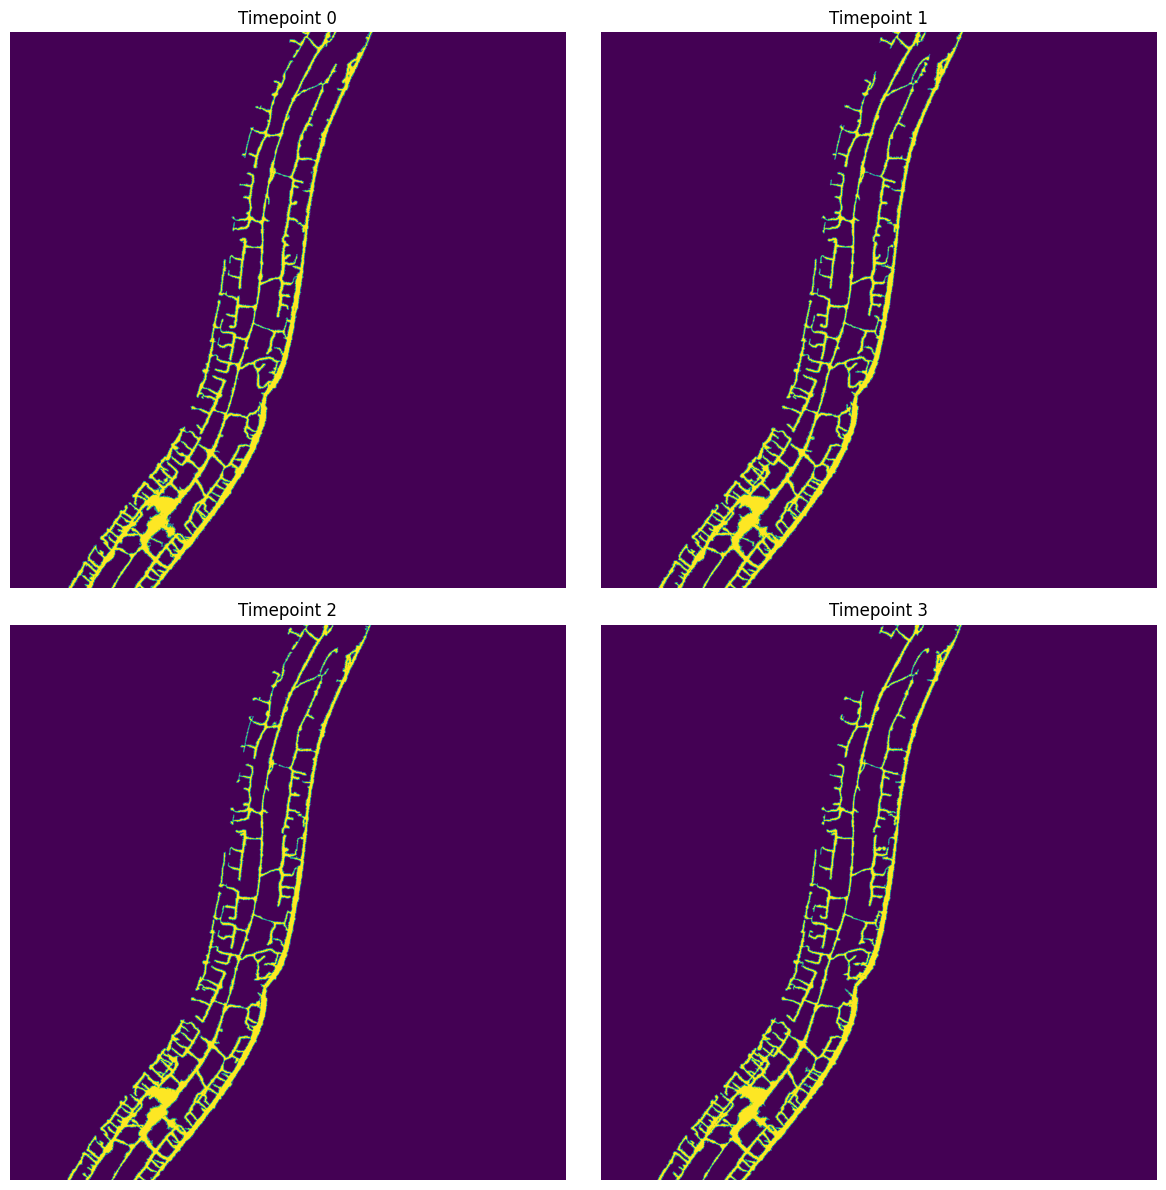

In [20]:


visualize_mips(pvd, save=True, output_dir=output_path)

In [30]:
import numpy as np
from scipy.spatial.distance import cosine
import pandas as pd
import time

def calculate_cosine_similarity_matrix(arrays):
    n = len(arrays)
    cosine_matrix = np.zeros((n, n))
    execution_time = 0

    for i in range(n):
        for j in range(n):
            try:
                flat_i = np.array(arrays[i], dtype=float).flatten()
                flat_j = np.array(arrays[j], dtype=float).flatten()
                
                start_time = time.time()
                cosine_matrix[i, j] = 1 - cosine(flat_i, flat_j)
                execution_time += time.time() - start_time

            except:
                cosine_matrix[i, j] = np.nan

    return cosine_matrix, execution_time

def calculate_quality_score(matrix):
    off_diag = matrix[~np.eye(matrix.shape[0], dtype=bool)]
    return np.nanmean(off_diag)

def save_results_to_csv(cosine_matrix, quality_score, execution_time, filename='cosine_similarity_results.csv'):
    df_cosine = pd.DataFrame(cosine_matrix, columns=[f't{i+1}' for i in range(len(cosine_matrix))])
    df_cosine['t'] = [f't{i+1}' for i in range(len(cosine_matrix))]

    cols = ['t'] + [col for col in df_cosine.columns if col != 'Array']
    df_cosine = df_cosine[cols]

    df_score = pd.DataFrame({
        'Metric': ['Quality Score', 'Execution Time (s)'],
        'Value': [quality_score, execution_time]
    })

    with open(filename, 'w', newline='') as f:
        df_cosine.to_csv(f, index=False)
        f.write('\n')
        df_score.to_csv(f, index=False)

    print(f"Results saved to {filename}")

def analyze_cosine_similarity(pvd, filename=f'{output_path}cosine_similarity_scores.csv'):
    arrays = [pvd.mip[i] for i in range(4)]
    
    cosine_matrix, execution_time = calculate_cosine_similarity_matrix(arrays)
    quality_score = calculate_quality_score(cosine_matrix)
    
    save_results_to_csv(cosine_matrix, quality_score, execution_time, filename)
    
    return cosine_matrix, quality_score, execution_time

# Usage
cosine_matrix, quality_score, execution_time = analyze_cosine_similarity(pvd)

print("Cosine Similarity Matrix:")
print(cosine_matrix)
print(f"\nQuality Score: {quality_score:.4f}")
print(f"Execution Time: {execution_time:.4f} seconds")

Results saved to pvd_analysis/DataSet01/exp240202_01_E_/cosine_similarity_scores.csv
Cosine Similarity Matrix:
[[1.         0.82147341 0.77807493 0.72382229]
 [0.82147341 1.         0.87045686 0.81751299]
 [0.77807493 0.87045686 1.         0.8568586 ]
 [0.72382229 0.81751299 0.8568586  1.        ]]

Quality Score: 0.8114
Execution Time: 0.9812 seconds
